In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the diabetes dataset to a pandas dataframe
diabetes_dataset = pd.read_csv('/content/Diabetes_Final.csv')

In [ ]:
# print first 5 rows of dataset
diabetes_dataset.head()

,pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,151,80,31,0,29.8,0.401,24,0
1,2,143,72,34,0,26.0,0.261,27,0
2,12,91,50,0,89,44.1,0.234,29,0
3,6,91,66,0,0,21.1,0.551,35,1
4,1,125,48,0,0,29.8,0.078,24,0


*Dataset is based on Females only*

***Pregnancies*** - no. of pregnancies

***Glucose*** - Glucose levels

***BloodPressure*** - BP levels

***SkinThickness*** - Measured from the skin at triceps(Fats stored)

***Insulin*** - Serum Insulin Levels

***BMI*** - Body Mass Index = Weight(in kgs)/((height(in meters))^2)

***DiabetesPedigreeFunction*** - Some diabetic value which indicates the function which scores the likelihood of diabetes based on family history.

***Age*** - indicates age of the person

***Outcome*** - ```0-->Non-Diabetic and 1-->Diabetic```





In [ ]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(810006, 9)

In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    528418
1    281588
Name: Outcome, dtype: int64

0-->Non-diabetic

1-->Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.850365,120.995907,69.138224,20.541518,80.109368,31.991307,0.472094,33.219270
1,3.848065,120.931052,69.087816,20.478071,80.043109,31.995206,0.470876,33.201017


In [ ]:
# separating data and labels
# Dropping a row-->axis = 0
# Dropping the column-->axis = 1
X = diabetes_dataset.drop(columns='Outcome',axis = 1)
# Store labels (Outcome) in Y
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

        pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0                 7      151             80             31        0  29.8   
1                 2      143             72             34        0  26.0   
2                12       91             50              0       89  44.1   
3                 6       91             66              0        0  21.1   
4                 1      125             48              0        0  29.8   
...             ...      ...            ...            ...      ...   ...   
810001            3      187             82             21        0  25.6   
810002            2       92             78             20      207  43.1   
810003            8      147             66             27      115  29.2   
810004            9       94             92             30        0  33.7   
810005            0      161             60             19        0  26.2   

        DiabetesPedigreeFunction  Age  
0                          0.401   

In [ ]:
print(Y)
# 0 to 810005 --> datap810006 points

0         0
1         0
2         0
3         1
4         0
         ..
810001    0
810002    1
810003    1
810004    0
810005    0
Name: Outcome, Length: 810006, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = pd.DataFrame(scaler.transform(X))
# Instead of using fit separately and transform separately, we can use scaler.fit_transform()

In [ ]:
print(standardized_data)
# All values are in the similar range..helps in better prediction

               0         1         2         3         4         5         6  \
0       0.935914  0.939397  0.562602  0.657751 -0.693001 -0.278377 -0.213617   
1      -0.549459  0.689113  0.148897  0.846028 -0.693001 -0.760820 -0.636797   
2       2.421287 -0.937730 -0.988790 -1.287786  0.077131  1.537130 -0.718410   
3       0.638839 -0.937730 -0.161381 -1.287786 -0.693001 -1.382917  0.239789   
4      -0.846533  0.125975 -1.092216 -1.287786 -0.693001 -0.278377 -1.189952   
...          ...       ...       ...       ...       ...       ...       ...   
810001 -0.252384  2.065673  0.666028  0.030158 -0.693001 -0.811603  0.665991   
810002 -0.549459 -0.906445  0.459176 -0.032601  1.098205  1.410172 -0.806068   
810003  1.232989  0.814255 -0.161381  0.406714  0.302114 -0.354552  1.500258   
810004  1.530063 -0.843874  1.183158  0.594991 -0.693001  0.216761 -0.385912   
810005 -1.143608  1.252251 -0.471659 -0.095360 -0.693001 -0.735428  0.747604   

               7  
0      -0.785332  
1

In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
# X --> data
# Y --> model

In [ ]:
print(X)
print(Y)
Y.fillna(1,inplace=True)

               0         1         2         3         4         5         6  \
0       0.935914  0.939397  0.562602  0.657751 -0.693001 -0.278377 -0.213617   
1      -0.549459  0.689113  0.148897  0.846028 -0.693001 -0.760820 -0.636797   
2       2.421287 -0.937730 -0.988790 -1.287786  0.077131  1.537130 -0.718410   
3       0.638839 -0.937730 -0.161381 -1.287786 -0.693001 -1.382917  0.239789   
4      -0.846533  0.125975 -1.092216 -1.287786 -0.693001 -0.278377 -1.189952   
...          ...       ...       ...       ...       ...       ...       ...   
810001 -0.252384  2.065673  0.666028  0.030158 -0.693001 -0.811603  0.665991   
810002 -0.549459 -0.906445  0.459176 -0.032601  1.098205  1.410172 -0.806068   
810003  1.232989  0.814255 -0.161381  0.406714  0.302114 -0.354552  1.500258   
810004  1.530063 -0.843874  1.183158  0.594991 -0.693001  0.216761 -0.385912   
810005 -1.143608  1.252251 -0.471659 -0.095360 -0.693001 -0.735428  0.747604   

               7  
0      -0.785332  
1

# Split data into Training & Test
using

```
train_test_split(X,Y,test_size,stratify,random_state)
```
function

``` X ``` = This is the dataframe where all 8 criteria of data is present

``` Y ``` = This dataframe contains all Output Labels

``` test_size ``` = percentage of data for testing

``` stratify ``` = to split our dataset in same proportion. Here it is done based on Y. If not used, all diabetic cases may go to one dataframe and all non-diabetic cases may go to another dataframe.

``` random_state ``` = This is like an index or a serial number for a particular way of splitting data.



In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 20)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(810006, 8) (648004, 8) (162002, 8)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(810006,) (648004,) (162002,)


In [ ]:
# GaussianNB
classifierGNB=GaussianNB(priors=[1,0])
classifierGNB.fit(X_train,Y_train)

GaussianNB(priors=[1, 0])

In [ ]:
X_train_pred_GNB = classifierGNB.predict(X_train)
train_acc_GNB = accuracy_score(X_train_pred_GNB, Y_train)
X_test_pred_GNB = classifierGNB.predict(X_test)
test_acc_GNB = accuracy_score(X_test_pred_GNB, Y_test)

[[105684      0]
 [ 56318      0]]


<Axes: >

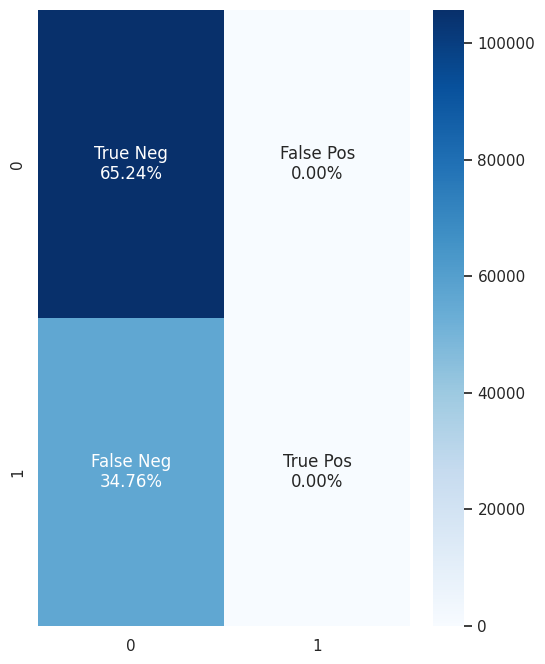

In [ ]:
cf_matrix_GNB = confusion_matrix(Y_test, X_test_pred_GNB)
print(cf_matrix_GNB)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_GNB.flatten()/np.sum(cf_matrix_GNB)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_GNB, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Stacking
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
# X, y = make_classification(n_samples=1000, random_state=42)

# Instantiate the Gaussian classifier
gaussian_classifier = GaussianNB()

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)

# Create the stacking ensemble classifier
estimators = [('gaussian', gaussian_classifier), ('random_forest', rf_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, Y_train)

# Make predictions using the stacking classifier
predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy of the stacking classifier
test_acc_Stacking = stacking_classifier.score(X_test, Y_test)

[[92643 13041]
 [25957 30361]]


<Axes: >

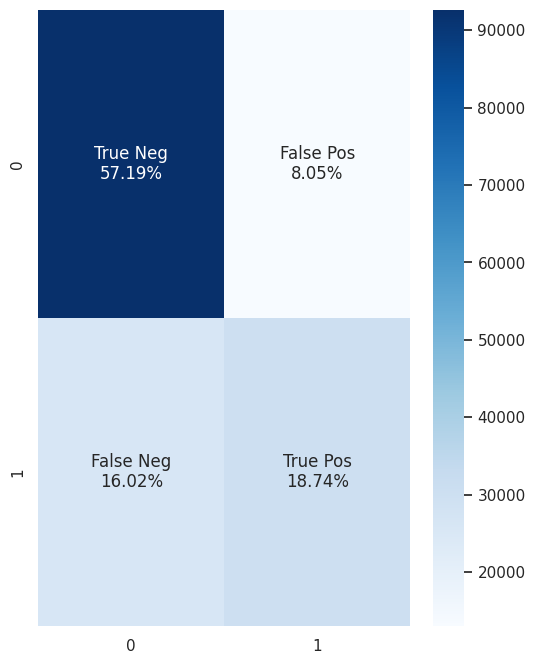

In [ ]:
cf_matrix_Stacking = confusion_matrix(Y_test, predictions)
print(cf_matrix_Stacking)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_Stacking.flatten()/np.sum(cf_matrix_Stacking)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_Stacking, annot=labels, fmt='', cmap='Blues')

In [ ]:
# RandomForestClassifier
classifierRF = RandomForestClassifier(warm_start=2,n_estimators=100)
classifierRF.fit(X_train,Y_train)

RandomForestClassifier(warm_start=2)

In [ ]:
X_train_pred_RF = classifierRF.predict(X_train)
train_acc_RF = accuracy_score(X_train_pred_RF, Y_train)
X_test_pred_RF = classifierRF.predict(X_test)
test_acc_RF = accuracy_score(X_test_pred_RF, Y_test)

[[105087    597]
 [ 11522  44796]]


<Axes: >

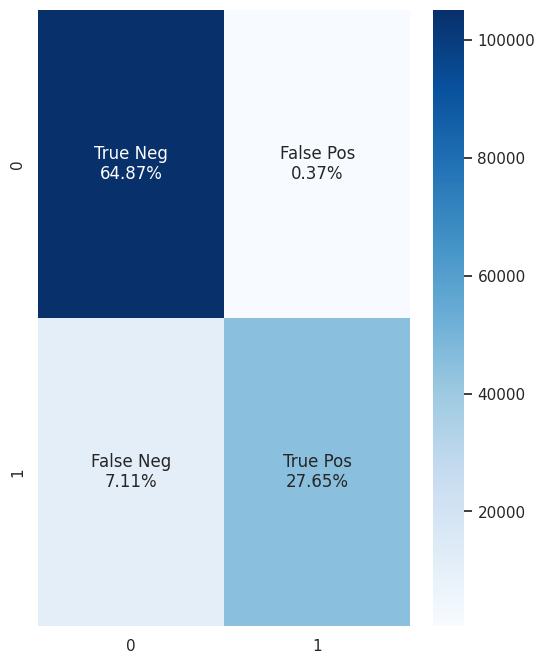

In [ ]:
cf_matrix_RF = confusion_matrix(Y_test, X_test_pred_RF)
print(cf_matrix_RF)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_RF.flatten()/np.sum(cf_matrix_RF)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_RF, annot=labels, fmt='', cmap='Blues')

# Model Evaluation

We will find the ``` accuracy_score ```



In [ ]:
scores = [test_acc_GNB, test_acc_Stacking, test_acc_RF]
algos = ["GaussianNB", "Stacking", "RandomForest"]
for i in range(len(algos)):
    print("The accuracy score achieved using "+algos[i]+" is: "+str(scores[i]*100)+" %")

The accuracy score achieved using GaussianNB is: 65.2362316514611 %
The accuracy score achieved using Stacking is: 75.9274576857076 %
The accuracy score achieved using RandomForest is: 92.51922815767706 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

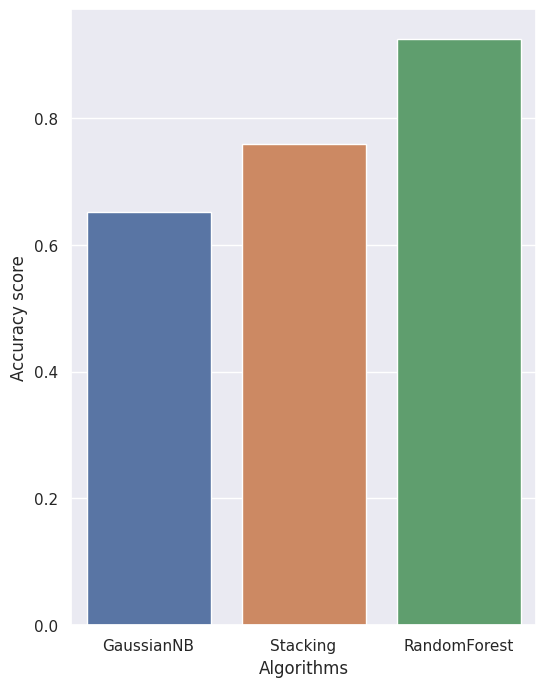

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algos,y=scores)

Making a Predictive System


In [ ]:
warnings.filterwarnings('ignore')
input_data = (5,166,72,19,175,25.8,0.587,51) # Non-Diabetic

# change input_data to a NumPy Array
input_data_as_numpy_array = np.asarray(input_data)
print("TYPE: ", type(input_data_as_numpy_array))

# reshape the array as we are predicting for one instance -- we are just using one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input_data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifierRF.predict(std_data)
print(prediction)

if prediction[0] == 0: #prediction is a list containing one element.. output is the first element of this list
  print("Non-diabetic")
elif prediction[0]==1:
  print("Diabetic")

TYPE:  <class 'numpy.ndarray'>
[[ 0.34176491  1.40867855  0.14889738 -0.09536027  0.82130392 -0.78621154
   0.34860646  1.51621273]]
[0]
Non-diabetic


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifierRF, open(filename, 'wb'))

In [ ]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51) # Non-Diabetic


# change input_data to a NumPy Array
input_data_as_numpy_array = np.asarray(input_data)
print("TYPE: ", type(input_data_as_numpy_array))

# reshape the array as we are predicting for one instance as -- we are just using one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input_data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if prediction[0] == 0: #prediction is a list containing one element..your output is the first element of this list
  print("Non-diabetic")
elif prediction[0]==1:
  print("Diabetic")

TYPE:  <class 'numpy.ndarray'>
[0]
Non-diabetic
